# Improving a model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Make a dataframe from the boston dataset
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])

In [4]:
# Load the heart disease dataset
heart_disease = pd.read_csv('./heart-disease.csv')

**Classification evaluation functions**

In [5]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set a random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# Make some predictions
y_preds = model.predict(X_test)

# Evaluate the classifier
print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1-Score: {f1_score(y_test, y_preds)}')

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1-Score: 0.8615384615384615


**Regression evaluation functions**

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Set a random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit a model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
# Make some predictions 
y_preds = model.predict(X_test)

# Evaluate the regression model
print('Regression model metrics on the test set')
print(f'R2 Score: {r2_score(y_test, y_preds)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_preds)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_preds)}')

Regression model metrics on the test set
R2 Score: 0.8654448653350507
Mean Absolute Error (MAE): 2.136382352941176
Mean Squared Error (MSE): 9.867437068627442


**Improving a model**

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (generally the more data, the better)
* Could we improve the data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Parameters vs hyperparameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyperparameters
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [12]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning by hand

Let's make 3 sets, training, validation, and test

In [13]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Random Forest Classifier doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [14]:
def evaluate_preds(y_true, y_preds):
    '''
    Performs evaluation comparison y_true labels vs y_preds labels.
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {'accuracy': round(accuracy, 2),
                   'precision': round(precision, 2),
                   'recall': round(recall, 2),
                   'f1': round(f1, 2)}
    
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')
    
    return metric_dict

In [15]:
# Manually split data into train, validation, and test set
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Set a random seed
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation , and test
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
val_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

X_train, y_train = X[:train_split], y[:train_split]
X_val, y_val = X[train_split:val_split], y[train_split:val_split]
X_test, y_test = X[val_split:], y[val_split:]

len(heart_disease_shuffled), len(X_train), len(X_val), len(X_test)

(303, 212, 45, 46)

In [16]:
np.random.seed(42)

# Instantiate and fit a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make baseline predictions
y_preds = model.predict(X_val)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_val, y_preds)
baseline_metrics;

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [17]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
model_2 = RandomForestClassifier(n_estimators=200)
model_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = model_2.predict(X_val)

# Evaluate the 2nd classifier
model_2_metrics = evaluate_preds(y_val, y_preds_2)
model_2_metrics;

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


In [18]:
np.random.seed(42)

# Create a third classifier with different hyperparameters
model_3 = RandomForestClassifier(n_estimators=100,
                                 max_depth=10)
model_3.fit(X_train, y_train)

# Make predictions
y_preds_3 = model_2.predict(X_val)

# Evaluate the 3rd classifier
model_3_metrics = evaluate_preds(y_val, y_preds_3)
model_3_metrics;

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


### Tuning with RandomizedSearchCV

In [19]:
heart_disease_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate a model
model = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCS
rs_model = RandomizedSearchCV(estimator=model,
                              param_distributions=grid,
                              n_iter=10, # number of models to try
                              cv=5,
                              verbose=2)

# Fit the RandomizedSearchCV version of model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   25.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [21]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [22]:
# Make predictions with the best hyperparams -> will automatically use the best_params_
rs_y_preds = rs_model.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### Tuning with GridSearchCV

In [26]:
heart_disease_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [25]:
grid = {'n_estimators': [100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}

In [28]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate a model
model = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCS
gs_model = GridSearchCV(estimator=model,
                        param_grid=grid,
                        cv=5,
                        verbose=2)

# Fit the GridSearchCV version of model
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   20.5s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [29]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [30]:
# Make predictions
gs_y_preds = gs_model.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


Let's compare our different models metrics

In [31]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                                'model_2': model_2_metrics,
                                'random_search': rs_metrics,
                                'grid_search': gs_metrics})

compare_metrics

,baseline,model_2,random_search,grid_search
accuracy,0.82,0.82,0.82,0.79
precision,0.84,0.81,0.77,0.74
recall,0.84,0.88,0.86,0.82
f1,0.84,0.85,0.81,0.78


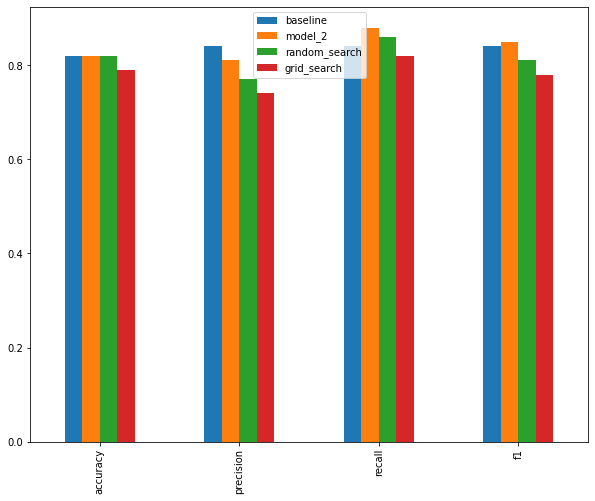

In [33]:
compare_metrics.plot.bar(figsize=(10, 8));

## Save and load a trained model

Two ways:
1. With python's `pickle` module
2. With the `joblib` module

In [48]:
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


**Pickle**

In [40]:
import pickle

# Save an existing model to file
pickle.dump(gs_model, open('./gs_model_random_forest_1.pkl', 'wb'))

In [36]:
# Load a saved model
loaded_pickle_model = pickle.load(open('./gs_model_random_forest_1.pkl', 'rb'))

In [38]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds);

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


**Joblib**

In [46]:
from joblib import dump, load

# Save model to file
dump(gs_model, filename='./gs_model_random_forest_1.joblib')

['./gs_model_random_forest_1.joblib']

In [43]:
# Load a saved model
loaded_joblib_model = load(filename='./gs_model_random_forest_1.joblib')

In [45]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds);

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78
